<h1>Chapter 03 Regression</h1>

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

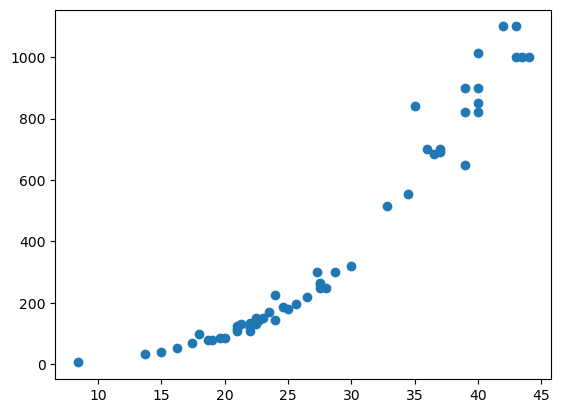

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape)

(42,)


In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape)

(42, 1)


<h2>결정계수(R^2) - Coefficient of determination</h2>
Classfication에서는 accuracy였지만, Regression에서는 R^2<br>
R^2 = (SUM(target-predict))^2 / (SUM(target-mean))^2<br>
<br>
overfitting : train good, test bad<br>
underfitting : train bad, test bad or good<br>
<br>
overfitting -> create simpler model (k value down)<br>
underfittin -> create more complex model (k value up)<br>

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.992809406101064
0.9698823289099254


In [6]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [7]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


<h2>Limitations of the KNResgression</h2>

In [8]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
knr.score(test_input, test_target)
print(knr.predict([[50]]))

[1033.33333333]


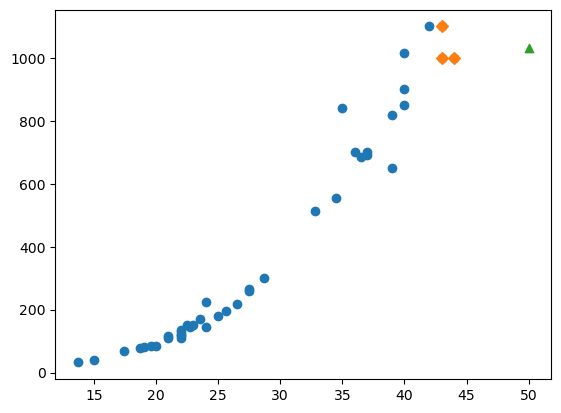

1033.3333333333333


In [11]:
import matplotlib.pyplot as plt

d, i = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='D')
plt.scatter(50, 1033, marker='^')
plt.show()

print(np.mean(train_target[i]))

<h2>Linear Regression</h2>
<h5>model parameters</h5>
coef_ = weight<br>
intercept_<br>

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535474


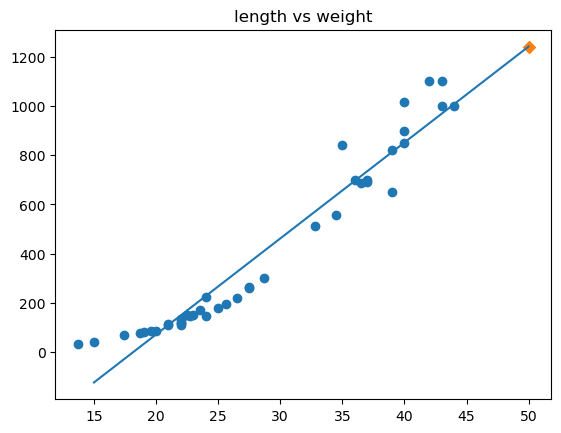

In [13]:
import matplotlib.pyplot as plt

a = lr.coef_
b = lr.intercept_

plt.scatter(train_input, train_target)
plt.scatter(50, 1241, marker='D')
plt.plot([15, 50], [15*a + b, 50*a + b])
plt.title('length vs weight')
plt.show()

In [14]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


<h2>Polynominal Regression</h2>

In [15]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278338


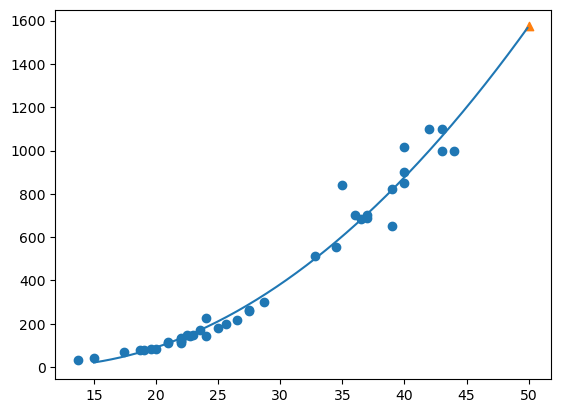

In [17]:
point = np.arange(15, 50, step=0.1)

plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)
plt.scatter(50, 1573, marker='^')
plt.show()

In [18]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [19]:
train_poly_3 = np.column_stack((train_input**3, train_input**2, train_input))
test_poly_3 = np.column_stack((test_input**3, test_input**2, test_input))

In [20]:
lr = LinearRegression()
lr.fit(train_poly_3, train_target)
print(lr.predict([[50**3, 50**2, 50]]))

[1379.41727785]


In [21]:
print(lr.score(train_poly_3, train_target))
print(lr.score(test_poly_3, test_target))

0.9729178478354533
0.958836372742297


<h2>Multiple Regression</h2>
<h2>Feature Engineering</h2>

In [22]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [23]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

<h3>Transformer</h3>
<br>
특성을 만들거나 전처리

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit_transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

In [25]:
poly = PolynomialFeatures(include_bias=False)
poly.fit_transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [26]:
poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(train_input)
print(train_input.shape)
print(train_poly.shape)
print(poly.get_feature_names_out())

(42, 3)
(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [27]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594159


In [29]:
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [30]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.999999999999769
-144.40490595353674


<h2>Regularization</h2>
<br>
Ridge -> square<br>
Lasso -> absolute<br>

<h3>Ridge</h3>

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615388


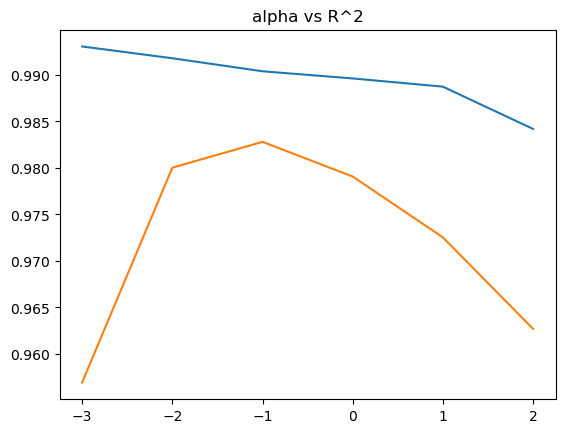

In [33]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    ridge = Ridge(alpha=a)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.title('alpha vs R^2')
plt.show()

In [34]:
alpha_fix = 0.1

ridge = Ridge(alpha=alpha_fix)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386955


<h3>Lasso</h3>

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [36]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    lasso = Lasso(alpha=a, max_iter=100000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    

/opt/anaconda3/envs/self/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/self/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


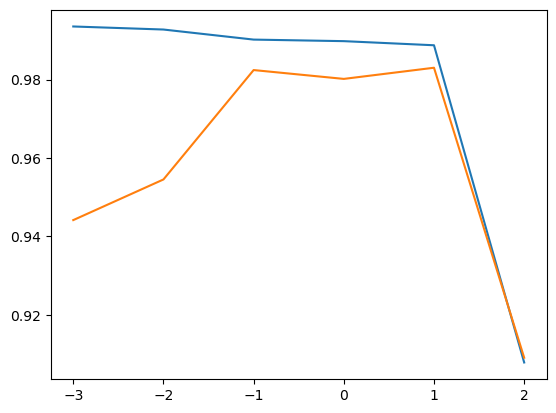

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [38]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [39]:
print(np.sum(lasso.coef_ == 0))
print(lasso.coef_)

40
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
